### Import necessities

In [3]:
import geopandas as gpd
import matplotlib as mpl
import pandas
wisc = gpd.read_file("WI_ltsb_corrected_final.shp")

### Edit columns
This operation will make three new columns. The sum of votes to the state senate and assembly are calculated for Republicans and Democrats. Then, they are added to find the 'total' voter pool (excluding third parties but their contribution is negligible). Finally, the useful columns are isolated.

In [4]:
wisc['strepvt'] = wisc.WSSREP12 + wisc.WSSREP212 + wisc.WSAREP12 + wisc.WSAREP212
wisc['stdemvt'] = wisc.WSSDEM12 + wisc.WSADEM12 + wisc.WSADEM212
wisc['sttotvt'] = wisc.strepvt + wisc.stdemvt
wisc = wisc[['geometry','ASM','sttotvt','strepvt','stdemvt']]
wisc.head()

,geometry,ASM,sttotvt,strepvt,stdemvt
0,"POLYGON ((273940.270 4871241.199, 273938.382 4...",41,461,184,277
1,"POLYGON ((274849.398 4870998.253, 274848.900 4...",41,450,178,272
2,"POLYGON ((273943.432 4871444.256, 273945.900 4...",41,201,80,121
3,"POLYGON ((273940.270 4871241.199, 273836.777 4...",41,252,100,152
4,"MULTIPOLYGON (((267546.959 4873058.127, 267547...",41,680,317,363


### Precinct level voter distribution
Let us remove all precincts with zero total votes. Then, the Democratic and Republican votes are normalized. 

In [15]:
pre = wisc.loc[wisc['sttotvt'] != 0]
pre['stdemnorm'] = pre.stdemvt/pre.sttotvt
pre.head()

/Users/Kazuto/opt/anaconda3/envs/geo_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,geometry,ASM,sttotvt,strepvt,stdemvt,stdemnorm
0,"POLYGON ((273940.270 4871241.199, 273938.382 4...",41,461,184,277,0.600868
1,"POLYGON ((274849.398 4870998.253, 274848.900 4...",41,450,178,272,0.604444
2,"POLYGON ((273943.432 4871444.256, 273945.900 4...",41,201,80,121,0.601990
3,"POLYGON ((273940.270 4871241.199, 273836.777 4...",41,252,100,152,0.603175
4,"MULTIPOLYGON (((267546.959 4873058.127, 267547...",41,680,317,363,0.533824


Now let us create a histogram of the percent Democratic and export it to png. 

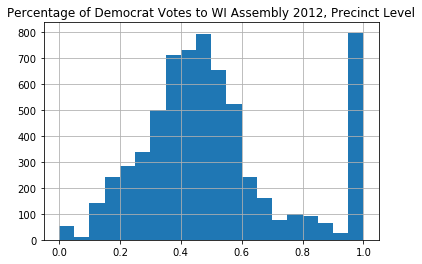

In [7]:
pre.hist(column='stdemnorm', bins=20)
mpl.pyplot.title('Percentage of Democrat Votes to WI Assembly 2012, Precinct Level')
mpl.pyplot.savefig("precinct-hist.png", dpi=300)

Before we create a map, let us check the crs.  

In [8]:
pre.crs

{'init': 'epsg:26916'}

Since the coordinate referece is appropriate, I will map the results. 

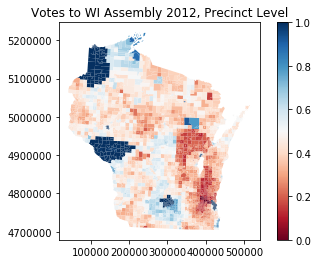

In [10]:
pre.plot(column='stdemnorm', cmap='RdBu', legend=True);
mpl.pyplot.title('Votes to WI Assembly 2012, Precinct Level')
mpl.pyplot.savefig("precinct-choro.png", dpi=300)

## District level voter distribution
Let us dissolve by the district id. Then like last time, we will normalize the votes. No need to remove zeros because no district has a total vote of zero. 

In [16]:
dist = wisc.dissolve(by='ASM', aggfunc='sum')
dist['stdemnorm'] = dist.stdemvt/dist.sttotvt
dist.head()

,geometry,sttotvt,strepvt,stdemvt,stdemnorm
ASM,,,,,
1,"MULTIPOLYGON (((456009.927 4963741.989, 456008...",33117,16993,16124,0.486880
2,"MULTIPOLYGON (((410868.035 4924347.221, 410738...",29129,17093,12036,0.413196
3,"MULTIPOLYGON (((391345.973 4902323.050, 391438...",28784,17387,11397,0.395949
4,"POLYGON ((412132.212 4922161.512, 412131.212 4...",50722,37955,12767,0.251705
5,"MULTIPOLYGON (((405020.670 4909332.074, 404807...",50867,38158,12709,0.249848


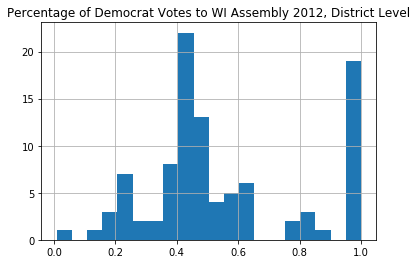

In [13]:
dist.hist(column='stdemnorm', bins=20)
mpl.pyplot.title('Percentage of Democrat Votes to WI Assembly 2012, District Level')
mpl.pyplot.savefig("district-hist.png", dpi=300)

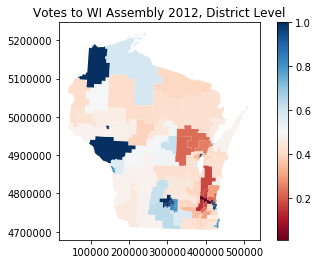

In [14]:
dist.plot(column='stdemnorm', cmap='RdBu', legend=True);
mpl.pyplot.title('Votes to WI Assembly 2012, District Level')
mpl.pyplot.savefig("district-choro.png", dpi=300)

### Exporting to shapefile

In [17]:
pre.to_file("precinct.shp")
dist.to_file("district.shp")